In [1]:
import pyreadstat
import pandas as pd
import numpy as np

from semopy import Model
from semopy.examples import multivariate_regression
from semopy import semplot
import semopy

import statsmodels.api as sm

In [2]:
semopy.examples.political_democracy.get_data()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [3]:
data = multivariate_regression.get_data()
data

,y1,y2,y3,x1,x2,x3
0,-1.989468,-0.015637,-0.162064,-0.086448,-0.728435,-0.158917
1,-0.777919,4.919949,1.222909,-0.722815,-0.552797,-2.290903
2,-1.951388,1.024939,2.402742,0.127013,0.796024,-0.040658
3,-2.084306,1.430075,-0.308923,0.317103,-0.015630,0.915825
4,1.729722,-3.632137,-2.926315,0.129123,-1.922594,1.652257
...,...,...,...,...,...,...
95,-3.850754,0.661794,-0.555356,-0.086717,0.636323,0.861046
96,-1.180733,1.595003,1.175348,-0.648488,-0.045442,-0.328253
97,0.658198,2.713970,2.133264,0.085195,-0.703850,-1.978876
98,-0.319996,2.372079,1.515024,0.510689,-0.335403,-1.551753


In [4]:
data['x2'].iloc[1:4] = 0

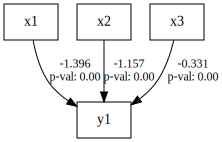

In [5]:
model2 = '''
y1 ~ x1 + x2 + x3
'''

semModel = Model(model2)
semModel.fit(data)
semModel.inspect()

semplot(semModel,"model.png",plot_covs=True)

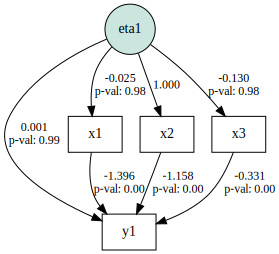

In [6]:
model2 = '''
#latent definition
eta1 =~ x2 + x3 + x1 + y1

#structure
y1 ~ x1 + x2 + x3
'''

semModel = Model(model2)
semModel.fit(data)
semModel.inspect()

semplot(semModel,"model.png",plot_covs=True)

In [7]:
model1 = '''
#latent definition
eta1 =~ y2 + y3
eta2 =~ x2 + x3 + x1
eta3, eta4 =~ y1

#structure
eta3 ~ x1 + x2 + x3
eta4 ~ y2 + y3

#additional covariance
eta3 ~~ eta4
'''

In [8]:
semModel = Model(model1)
semModel.fit(data)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y2,~,eta1,1.000000,-,-,-
1,y3,~,eta1,1.188872,0.158818,7.485764,0.0
2,x2,~,eta2,1.000000,-,-,-
3,x3,~,eta2,-1.219674,0.233911,-5.214274,0.0
4,x1,~,eta2,0.382039,0.107527,3.552961,0.000381
5,eta3,~,x1,-1.525951,0.07943,-19.211194,0.0
6,eta3,~,x2,-0.970558,0.177653,-5.46323,0.0
7,eta3,~,x3,-0.523004,0.145087,-3.60476,0.000312
8,eta4,~,y2,-0.173346,0.055119,-3.144923,0.001661
9,eta4,~,y3,0.002497,0.098635,0.025311,0.979807


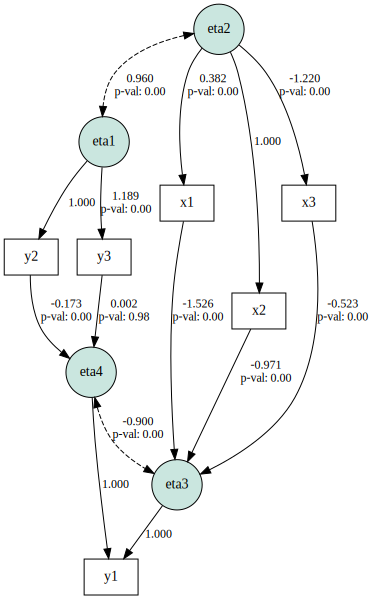

In [9]:
semplot(semModel,"model.png",plot_covs=True)

In [10]:
df = pd.read_csv('data.csv', low_memory=False)
df.sample(5)

,Unnamed: 0,version,caseid,weight_ftf,weight_web,weight_full,psu_full,psu_ftf,strata_full,strata_ftf,...,randordq_casitherm_illegal,randordq_casitherm_white,randordq_stereogroups,randordq_discrim_black,randordq_discrim_hisp,randordq_discrim_white,randordq_discrim_gay,randordq_discrim_women,randordq_stereorelig,invited_inetrecontact2013
4274,4274,ANES2012TimeSeries_version20160504,5222.0,0.0,0.469,0.469,2346.0,NaN,10.0,NaN,...,1.0,2.0,132.0,-2.0,-2.0,-2.0,-2.0,-2.0,1234.0,0.0
2521,2521,ANES2012TimeSeries_version20160504,3468.0,0.0,0.347,0.347,592.0,NaN,10.0,NaN,...,2.0,3.0,132.0,-2.0,-2.0,-2.0,-2.0,-2.0,4132.0,0.0
3357,3357,ANES2012TimeSeries_version20160504,4304.0,0.0,0.450,0.450,1428.0,NaN,10.0,NaN,...,2.0,4.0,213.0,-2.0,-2.0,-2.0,-2.0,-2.0,3142.0,1.0
2868,2868,ANES2012TimeSeries_version20160504,3815.0,0.0,0.210,0.210,939.0,NaN,10.0,NaN,...,4.0,3.0,213.0,-2.0,-2.0,-2.0,-2.0,-2.0,2314.0,0.0
5437,5437,ANES2012TimeSeries_version20160504,6388.0,0.0,0.142,0.142,3512.0,NaN,10.0,NaN,...,4.0,3.0,231.0,-2.0,-2.0,-2.0,-2.0,-2.0,1432.0,0.0


In [11]:
features = ['prevote_intpres',
 'prevote_intpreswho',
 'prevote_intpreswho_oth',
 'prevote_intpresst',
 'candaff_angdpcoft',
 'candaff_hpdpcoft',
 'candaff_afrdpcoft',
 'candaff_prddpcoft',
 'candaff_angrpcoft',
 'candaff_hprpcoft',
 'candaff_afrrpcoft',
 'candaff_prdrpcoft',
 'ctrait_dpcmoral',
 'ctrait_dpclead',
 'ctrait_dpccare',
 'ctrait_dpcknow',
 'ctrait_dpcint',
 'ctrait_dpchonst',
 'ctrait_rpcmoral',
 'ctrait_rpclead',
 'ctrait_rpccare',
 'ctrait_rpcknow',
 'ctrait_rpcint',
 'ctrait_rpchonst']

In [12]:
df[features].describe()

,prevote_intpres,prevote_intpreswho,prevote_intpreswho_oth,prevote_intpresst,candaff_angdpcoft,candaff_hpdpcoft,candaff_afrdpcoft,candaff_prddpcoft,candaff_angrpcoft,candaff_hprpcoft,...,ctrait_dpccare,ctrait_dpcknow,ctrait_dpcint,ctrait_dpchonst,ctrait_rpcmoral,ctrait_rpclead,ctrait_rpccare,ctrait_rpcknow,ctrait_rpcint,ctrait_rpchonst
count,5914.000000,5914.000000,5914.0,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,...,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000
mean,0.626987,0.703247,-2.0,0.658099,0.842915,1.278999,0.196314,1.070172,0.640852,0.353906,...,2.785932,2.403449,2.120900,2.789313,2.760061,2.957051,3.574907,2.761921,2.474806,3.210010
std,1.177265,2.092249,0.0,1.061820,2.149694,2.019592,1.894971,1.991266,2.027845,1.943140,...,1.856741,1.673874,1.521177,1.846900,2.365493,2.260892,2.203241,2.036152,1.995206,2.322369
min,-9.000000,-9.000000,-2.0,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.000000,1.000000,-2.0,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,-2.0,1.000000,-1.000000,2.000000,-1.000000,1.000000,-1.000000,-1.000000,...,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.500000,4.000000
75%,1.000000,2.000000,-2.0,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,5.000000
max,2.000000,5.000000,-2.0,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
DEMO = 1
REP = 2

In [14]:
demo_features = [
    'prevote_intpresst','candaff_angdpcoft','candaff_hpdpcoft','candaff_afrdpcoft',
    'candaff_prddpcoft','ctrait_dpcmoral','ctrait_dpclead','ctrait_dpccare',
    'ctrait_dpcknow','ctrait_dpcint','ctrait_dpchonst']

df_demo = df[demo_features][df['prevote_intpreswho'] == DEMO]
df_demo.sample(5)

,prevote_intpresst,candaff_angdpcoft,candaff_hpdpcoft,candaff_afrdpcoft,candaff_prddpcoft,ctrait_dpcmoral,ctrait_dpclead,ctrait_dpccare,ctrait_dpcknow,ctrait_dpcint,ctrait_dpchonst
1227,1.0,-1.0,4.0,-1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2155,1.0,-1.0,2.0,-1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
2596,1.0,3.0,3.0,4.0,-1.0,2.0,3.0,1.0,1.0,2.0,1.0
3298,1.0,-1.0,2.0,-1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0
2003,1.0,-1.0,4.0,-1.0,2.0,2.0,3.0,2.0,3.0,2.0,1.0


In [15]:
linear_model = sm.OLS(df_demo['prevote_intpresst'], df_demo[demo_features[1:]]).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      prevote_intpresst   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              765.4
Date:                Sat, 06 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:04:54   Log-Likelihood:                         -2506.7
No. Observations:                2624   AIC:                                      5033.
Df Residuals:                    2614   BIC:                                      5092.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
candaff_angdpcoft     0.0013      0.006      0.200      0.841      -0.011       0.014
candaff_hpdpcoft      0.0684      0.009      7.328      0.000       0.050       0.087
candaff_afrdpcoft    -0.0617      0.010     -6.348      0.000      -0.081      -0.043
candaff_prddpcoft     0.0401      0.009      4.591      0.000       0.023       0.057
ctrait_dpcmoral       0.0246      0.012      2.013      0.044       0.001       0.048
ctrait_dpclead        0.1059      0.016      6.773      0.000       0.075       0.137
ctrait_dpccare        0.0881      0.016      5.444      0.000       0.056       0.120
ctrait_dpcknow        0.0159      0.021      0.762      0.446      -0.025       0.057
ctrait_dpcint         0.1305      0.020      6.592      0.000       0.092       0.169
ctrait_dpchonst       0.0524      0.016      3.217      0.001       0.020       0.084
==============================================================================
Omnibus:                     3601.513   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799459.023
Skew:                          -7.485   Prob(JB):                         0.00
Kurtosis:                     130.414   Cond. No.                         11.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model1 = '''
#latent definition
trait_latent =~ ctrait_dpcmoral + ctrait_dpclead + ctrait_dpccare +\
                ctrait_dpcknow + ctrait_dpcint + ctrait_dpchonst + prevote_intpresst
#affect_latent =~ candaff_angdpcoft + candaff_hpdpcoft +candaff_afrdpcoft + candaff_prddpcoft + prevote_intpresst

#structure
prevote_intpresst ~ ctrait_dpcmoral + ctrait_dpclead + ctrait_dpccare + ctrait_dpcknow +\
                    ctrait_dpcint + ctrait_dpchonst #+ candaff_angdpcoft + candaff_hpdpcoft +\
                    candaff_afrdpcoft + candaff_prddpcoft
#trait_latent ~ prevote_intpresst
'''

In [30]:
semModel = Model(model1)
semModel.fit(df_demo)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ctrait_dpcmoral,~,trait_latent,1.000000,-,-,-
1,ctrait_dpclead,~,trait_latent,0.920746,0.029281,31.444982,0.0
2,ctrait_dpccare,~,trait_latent,0.944001,0.029195,32.334239,0.0
3,ctrait_dpcknow,~,trait_latent,0.956746,0.027112,35.288185,0.0
4,ctrait_dpcint,~,trait_latent,0.716585,0.022849,31.362458,0.0
5,ctrait_dpchonst,~,trait_latent,0.952699,0.02946,32.339116,0.0
6,prevote_intpresst,~,trait_latent,-0.586591,0.003808,-154.034727,0.0
7,prevote_intpresst,~,ctrait_dpcmoral,0.071791,0.010885,6.595276,0.0
8,prevote_intpresst,~,ctrait_dpclead,0.122882,0.014019,8.765633,0.0
9,prevote_intpresst,~,ctrait_dpccare,0.129540,0.014647,8.844079,0.0


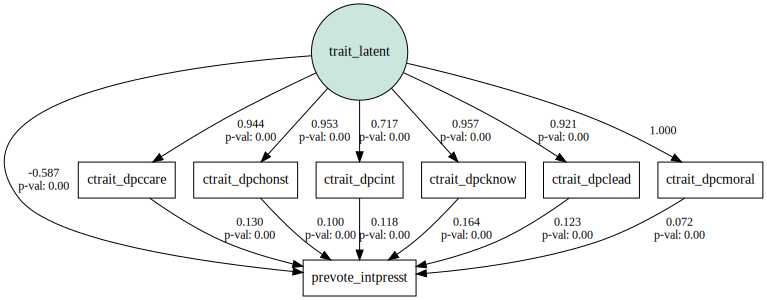

In [31]:
semplot(semModel,"model.png",plot_covs=True)

In [ ]:
caring  = actual + bias
leader = actual + bias


y ~ x1 + x2 ..

In [19]:
rep_features = [
    'prevote_intpresst','candaff_angrpcoft','candaff_hprpcoft','candaff_afrrpcoft',
    'candaff_prdrpcoft','ctrait_rpcmoral','ctrait_rpclead','ctrait_rpccare',
    'ctrait_rpcknow','ctrait_rpcint','ctrait_rpchonst']

df_rep = df[rep_features][df['prevote_intpreswho'] == REP]
df_rep.sample(5)

,prevote_intpresst,candaff_angrpcoft,candaff_hprpcoft,candaff_afrrpcoft,candaff_prdrpcoft,ctrait_rpcmoral,ctrait_rpclead,ctrait_rpccare,ctrait_rpcknow,ctrait_rpcint,ctrait_rpchonst
151,1.0,-1.0,4.0,-1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0
623,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1162,1.0,-1.0,4.0,-1.0,-1.0,2.0,2.0,2.0,3.0,2.0,2.0
1653,1.0,-1.0,2.0,-1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
939,1.0,-1.0,2.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,2.0


In [20]:
model3 = '''
#latent definition
trait_latent =~ ctrait_rpcmoral + ctrait_rpclead + ctrait_rpccare +\
                ctrait_rpcknow + ctrait_rpcint + ctrait_rpchonst + prevote_intpresst
affect_latent =~ candaff_angrpcoft + candaff_hprpcoft +\
                candaff_afrrpcoft + candaff_prdrpcoft + prevote_intpresst

#structure
prevote_intpresst ~ ctrait_rpcmoral + ctrait_rpclead + ctrait_rpccare + ctrait_rpcknow +\
                    ctrait_rpcint + ctrait_rpchonst + candaff_angrpcoft + candaff_hprpcoft +\
                    candaff_afrrpcoft + candaff_prdrpcoft

#additional covariance
trait_latent ~~ affect_latent
'''

In [21]:
semModel2 = Model(model3)
semModel2.fit(df_rep)
semModel2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ctrait_rpcmoral,~,trait_latent,1.000000,-,-,-
1,ctrait_rpclead,~,trait_latent,1.084579,0.035761,30.32892,0.0
2,ctrait_rpccare,~,trait_latent,1.157425,0.03705,31.239172,0.0
3,ctrait_rpcknow,~,trait_latent,0.983201,0.031057,31.658416,0.0
4,ctrait_rpcint,~,trait_latent,0.919900,0.030788,29.878381,0.0
5,ctrait_rpchonst,~,trait_latent,1.026007,0.03531,29.0575,0.0
6,candaff_angrpcoft,~,affect_latent,1.000000,-,-,-
7,candaff_hprpcoft,~,affect_latent,0.092694,0.064765,1.431219,0.152367
8,candaff_afrrpcoft,~,affect_latent,0.784672,0.137343,5.713227,0.0
9,candaff_prdrpcoft,~,affect_latent,-0.188007,0.080845,-2.325517,0.020044


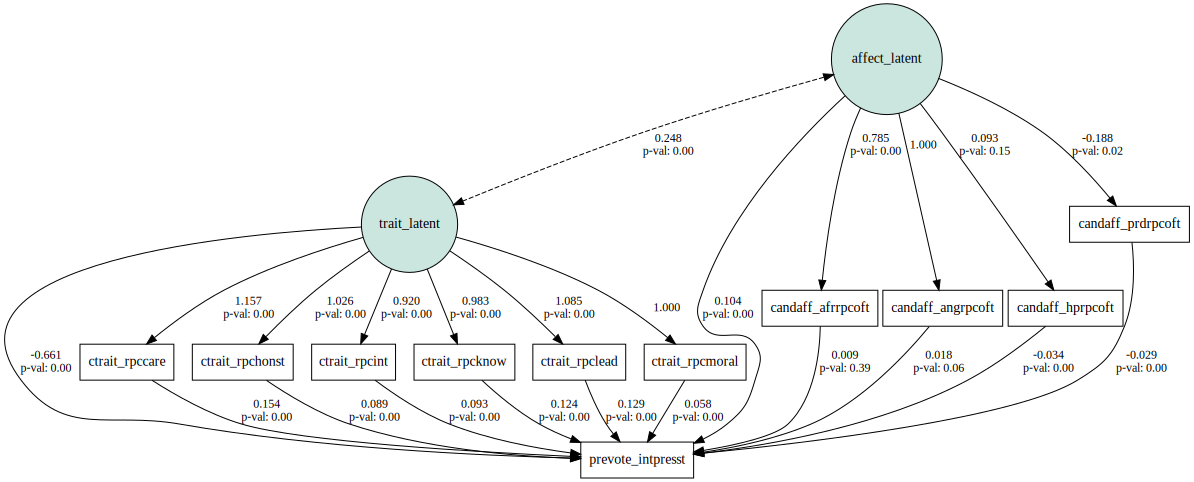

In [22]:
semplot(semModel2,"model2.png",plot_covs=True)